#### Data analysis notebook

Reads in the data files and plot results



In [15]:
from RunManager import RunManager
from Geant4Analyzer import Geant4Analyzer
import matplotlib.pyplot as plt
import numpy as np


In [16]:
manager = RunManager("../run/rundb.json")
display(manager.display_all_runs(include_deleted=False))

,id,particle,ion,energy,fastSimulation,maxScatters,maxEnergy,sourceVolume,outputDir,outputFile,numEvents,numJobs,randomSeed,settingsFile,status
0,run_01,gamma,None,1. MeV,false,-999,-1.0 MeV,,/data/xenon/acolijn/G4FastSim/20240917_161721,std,10000,1,714114,settings.json,active
1,run_02,geantino,None,1. MeV,true,1,1.2 MeV,,/data/xenon/acolijn/G4FastSim/20240918_102454,fast,100000,1,82757,settings.json,active
2,run_03,gamma,None,1. MeV,false,-999,-1.0 MeV,,/data/xenon/acolijn/G4FastSim/20240918_102545,std,100000,1,552843,settings.json,active
3,run_04,gamma,None,1. MeV,false,-999,-1.0 MeV,,/data/xenon/acolijn/G4FastSim/20240918_103046,std,100000,1,521551,settings.json,active
4,run_05,gamma,None,1. MeV,false,-999,-1.0 MeV,,/data/xenon/acolijn/G4FastSim/20240918_143454,std,100000,1,777109,settings.json,active
5,run_06,gamma,None,1. MeV,false,-999,-1.0 MeV,,/data/xenon/acolijn/G4FastSim/20240918_150140,std,100000,1,219042,settings.json,active
6,run_07,ion,11 22,None,None,-1,None,,/data/xenon/acolijn/G4FastSim/20240918_154606,na22,100000,1,49589,settings.json,active
7,run_08,ion,11 22,None,None,-1,None,,/data/xenon/acolijn/G4FastSim/20240918_154631,na22,100000,1,198388,settings.json,active
8,run_09,ion,11 22,None,None,-1,None,,/data/xenon/acolijn/G4FastSim/20240918_160039,na22,100000,1,469260,settings.json,active
9,run_10,ion,11 22,None,None,-1,None,,/data/xenon/acolijn/G4FastSim/20240918_160515,na22,100000,1,927022,settings.json,active


In [30]:
# cut on the global event variables
gxe = 0 # gaseous xenon
lxe = 1 # liquid xenon
nai = 2 # NaI detector

cut = lambda data: (data['ndet'][:,lxe] == 1 )
# additional cuts on the clusters
#cut_hit = lambda data: (data['r'] < 1104.) & (np.abs(data['zh']) < 1104.) & (data['eh'] > 0.)
cut_hit = lambda data: (data['eh'] > 0.) 

std = Geant4Analyzer("run_10", first_only=False)
std.preprocess_data(cut=cut, cut_hit=cut_hit)


Initialized Geant4Analyzer with run_id=run_10, label=ion: $^{22}$Na
Loading data from ['/data/xenon/acolijn/G4FastSim/20240918_160515/na22_0.root']
Loading /data/xenon/acolijn/G4FastSim/20240918_160515/na22_0.root
Data loaded from 1 files
Data loaded from ['/data/xenon/acolijn/G4FastSim/20240918_160515/na22_0.root']


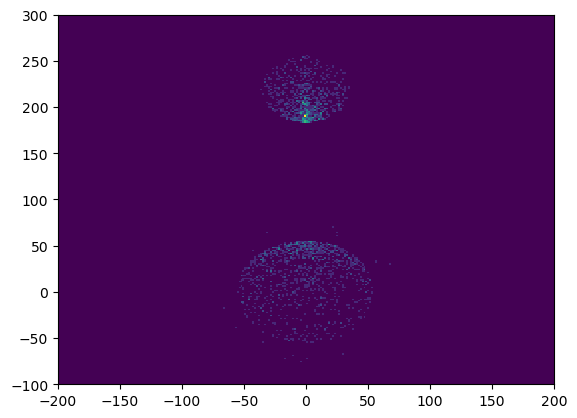

In [31]:
h = plt.hist2d(std.data['xh'], std.data['yh'], bins=250, range=[[-200,200],[-100,300]])

integral = 1057.0


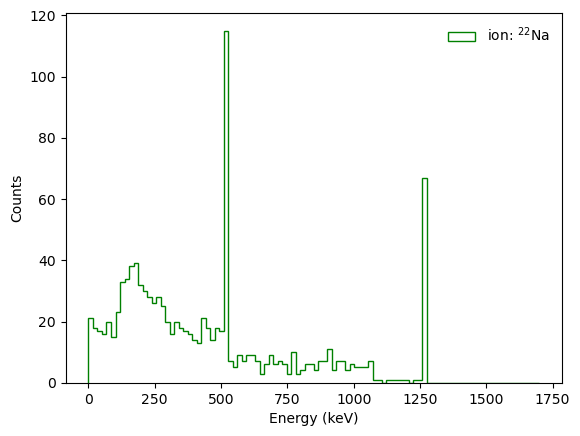

In [25]:
ax = std.plot_histogram("eh", bins=100, range=(0, 1700), show=True)

ax.set_ylim(1e-2, 1e5)
ax.set_yscale('log')
#plt.show()

Text(0, 0.5, 'z (mm)')

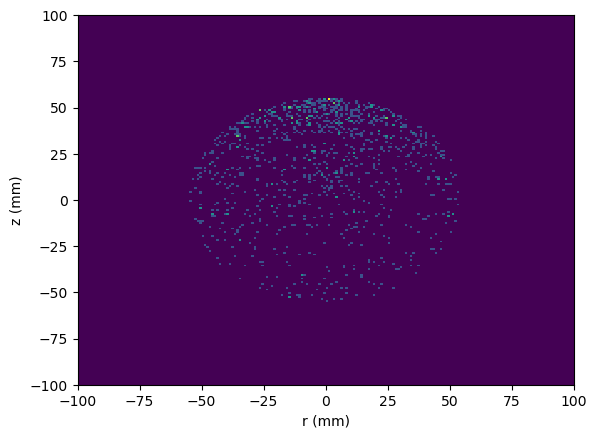

In [26]:
h2 = plt.hist2d(std.data['xh'], std.data['yh'], bins=200, range=((-100, 100), (-100, 100)))
plt.xlabel("r (mm)")
plt.ylabel("z (mm)")

Text(0, 0.5, 'z (mm)')

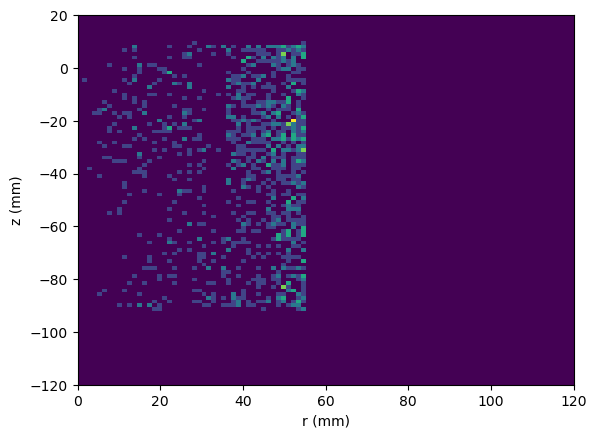

In [28]:
h2 = plt.hist2d(std.data['r'], std.data['zh'], bins=100, range=((0, 120), (-120, 20)))
plt.xlabel("r (mm)")
plt.ylabel("z (mm)")

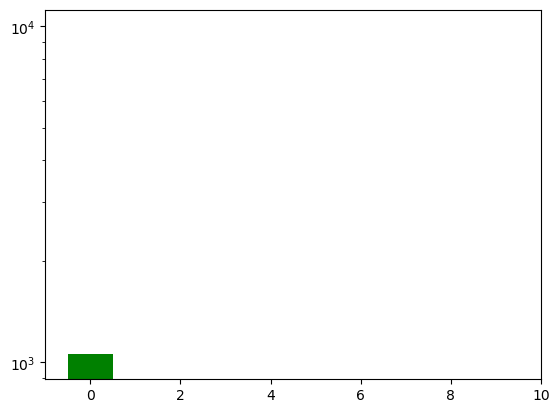

In [33]:
h = plt.hist(std.data['type'], bins=10, range=(-0.5, 9.5))
plt.yscale('log')